<a href="https://colab.research.google.com/github/mitawhy/Mini-Project-Data-Mining/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MEMPREDIKSI KESUKSESAN STARTUP DARI CRUNCHBASE**

#**Import Library**

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install geopandas
import geopandas as gpd
import plotly.express as px

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk memprediksi kesuksesan dari beberapa startup yang saat ini tengah beroperasi. Apakah startup-startup tersebut akan berubah menjadi sukses atau justru gagal. Dengan adanya dataset ini, dapat membantu para investor untuk mengidentifikasi startup dengan potensi tinggi dan menghindari usaha berisiko. Dengan itu, investor dapat membuat keputusan investasi yang tepat. Dataset yang ada juga dapat memberikan informasi kepada startup terkait agar dapat melakukan evaluasi. Selain itu, dataset ini juga dapat menentukan startup di bidang apa yang akan mencapai kesuksesan besar.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah tingkat risiko kegagalan yang cukup tinggi pada startup. Dengan ketersediaan data yang cukup, dapat membantu para pendiri startup untuk memahami dan menganalisis faktor-faktor apa saja yang dapat memberikan kegagalan untuk startup nya dan dapat menghindari hal tersebut.

##**Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah untuk memprediksi kesuksesan dari beberapa startup yang saat ini sedang berjalan/beroperasi. Data mining digunakan untuk menganalisis, mengidentifikasi, dan menentukan karakteristik yang membedakan antara startup yang sukses dan yang gagal. Masalah ini akan diselesaikan melalui pendekatan Supervised Machine Learning dengan melatih model berdasarkan sejarah startup yang diakuisisi atau ditutup.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan mengumpulkan data-data yang relevan terkait startup, seperti data keuangan dan lainnya dari sumber yang telah tersedia. Lalu dilakukan pemahaman yang mendalam terkait dataset yang ada. Selanjutnya, dilakukan pemeriksaan, pembersihan, dan persiapan data untuk di analisis. Kemudian menentukan tools apa saja yang akan digunakan. Nantinya, hasil dari data mining pada dataset ini akan digunakan oleh orang-orang terkait yang membutuhkan data tersebut sebagai bahan pertimbangan untuk bisnisnya.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset dengan judul "Startup Success/Fail Dataset from Crunchbase" yang digunakan kali ini didapatkan dari website 'Kaggle'. Dimana dataset ini berisikan data-data yang digunakan untuk memprediksi kesuksesan startup yang ada pada dataset ini.

Link Sumber Dataset: https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase

In [166]:
data = 'https://raw.githubusercontent.com/mitawhy/Mini-Project-Data-Mining/main/Checkpoint%201/big_startup_success_dataset.csv'
df = pd.read_csv(data)
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


##**Describe Data**

####Informasi Dasar

In [167]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 66368
Jumlah kolom: 14


Dari output yang tampil di atas, dijelaskan bahwa terdapat 66.368 baris dan 14 kolom pada dataset tersebut.

####Informasi Lanjutan

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


Jangan lupa sertakan penjelasan tiap kolomnya di sini ya, dari nama kolom, berapa jumlahnya, dan tipe data dari kolom tersebut (Kalau kolomnya 10 ya di buat sampai nomor 10)
Berikut adalah penjelasan untuk setiap kolom:
1. **permalink**: Berisi link ke organisasi perushaan tersebut di crunchbase. Memiliki 66368 baris dan bertipe data object (string atau teks).
2. **name**: Berisi nama startup. Memiliki 66367 baris dan bertipe data object.
3. **homepage_url**: Kolom ini berisikan situs dari startup nya. Memiliki 61310 baris dan bertipe data object.
4. **category_list**: Berisi jenis atau kategori dari startup tersebut, seperti finance, sports, dll. Memiliki 63220 baris dan bertipe data object.
5. **funding_total_usd**: Berisi total pendaan startup dalam USD. Memiliki 66368 baris dan bertipe data object.
6. **status**: Berisi status dari startup seperti operating, closed, acquired, dan ipo. Memiliki 66368 baris dan bertipe data object.
7. **country_code**: Berisi kode negara dari startup. Memiliki 59410 baris dan bertipe data object.
8. **state_code**: Berisi Kode Negara lokasi perusahaan. Memiliki 57821 baris dan bertipe data object.
9. **region**: Berisi Wilayah lokasi perusahaan. Memiliki 58338 baris dan bertipde data object.
10. **city**: Berisi Kota lokasi perusahaan. Memiliki 58340 baris dan bertipe data object.
11. **funding_rounds**: Berisi jumlah putaran pendanaan startup. Memiliki 66368 baris dan bertipe data int64 (bilangan bulat).
12. **founded_at**: Berisi tanggal didirikannya perusahaan/startup. Memiliki 51147 baris dan bertipe data object.
13. **first_funding_at**: Berisi tanggal pendanaan pertama startup. Memiliki 66344 baris dan bertipe data object.
14. **last_funding_at**: Berisi tanggal pendanaan terakhir startup. Memiliki 66368 baris dan bertipe data object.





####Informasi Statistik Deskriptif

In [169]:
df.describe()

,funding_rounds
count,66368.000000
mean,1.732522
std,1.360251
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


Tabel di atas menunjukkan kolom hasil statistik dari kolom numerik yang ada pada dataset. Pada dataset ini, terdapat kolom funding_rounds sebagai kolom numerik. Kolom funding_rounds menunjukkan jumlah putaran pendanaan yang dilakukan oleh perusahaan/startup yang ada.

* **count**: Jumlah total putaran pendanaan dari seluruh startup adalah 66368.000000
* **mean**: Rata-rata startup melakukan putaran pendanaan sebanyak 1,7 atau 2 kali.
* **std**: Standar deviasi nya sekitar 1 kali. Angka ini tergolong rendah, maka dari itu variasi data kecil.
* **min**: Putaran pendanaan yang paling rendah dilakukan sebanyak 1 kali.
* **25%**: Kuartil pertama, 25% startup melakukan putaraan pendanaan sebanyak 1 kali.
* **50%**: Kuartil kedua, 50% startup melakukan putaran pendanaan sebanyak 1 kali.
* **75%**: Kuartil ketiga, 75% startup melakukan putaran pendanaan sebanyak 2 kali.
* **max**: Putaran pendanaan pada startup paling banyak dilakukan sebanyak 19 kali.

##**Exploratory Data Analysis**

#### **Presentase Status Startup**

Text(0.5, 1.0, 'Persentase Status Startup')

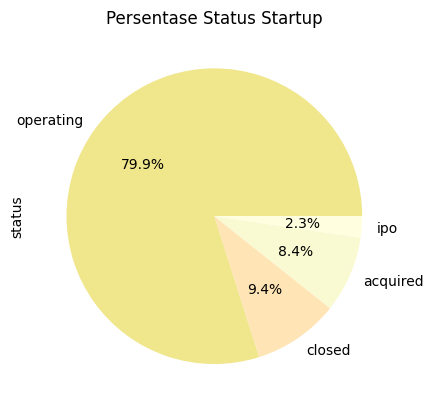

In [170]:
fig, ax = plt.subplots()

status_counts = df['status'].value_counts()
colors = {'operating' : 'khaki', 'closed' : 'moccasin', 'acquired' : 'lightgoldenrodyellow', 'ipo' : 'lightyellow'}
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=[colors[k] for k in status_counts.index])
plt.title("Persentase Status Startup")

Diagram di atas menunjukkan bahwa sebanyak 79,9% startup yang ada pada dataset masih beroperasi hingga sekarang. Sedangkan 9,4% startup sudah tutup atau berhenti beroperasi. 8,4% telah diakuasi/diambil alih oleh perusahaan lain. Dan 2,3% startup lainnya sedang/telah transisi dari perusahaan swasta ke perusahaan publik, dari awalnya perusahaan yang sepenuhnya dimiliki terbatas secara privat kemudian menjadi perusahaan terbuka yang bisa dimiliki siapa saja.

#### **Jumlah Startup berdasarkan Funding Rounds**

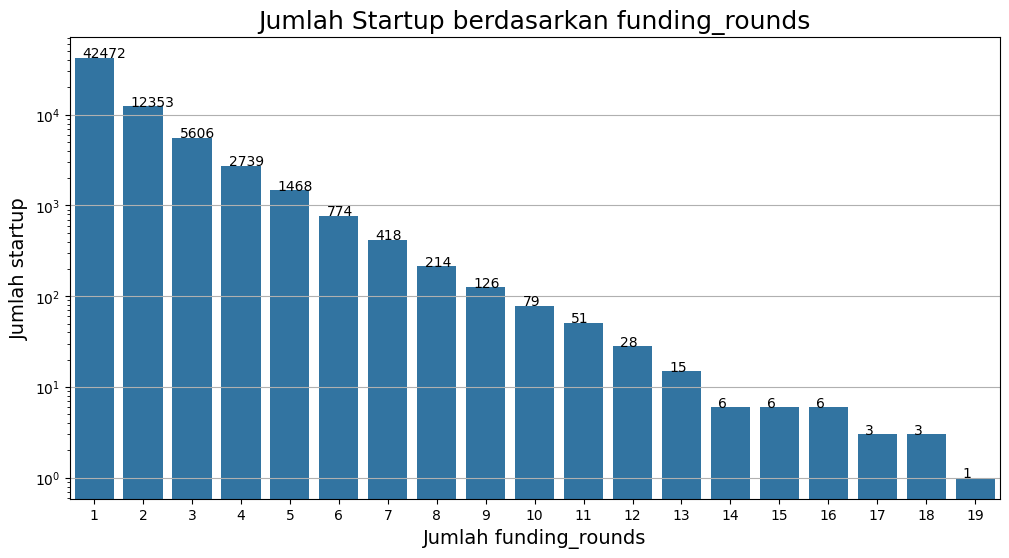

In [171]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['funding_rounds'].value_counts().index, y=df['funding_rounds'].value_counts())
plt.title('Jumlah Startup berdasarkan funding_rounds',size=18)
plt.ylabel('Jumlah startup',size=14)
plt.xlabel('Jumlah funding_rounds', size=14)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(df['funding_rounds'].value_counts().index,df['funding_rounds'].value_counts())

Berdasarkan diagram di atas, terlihat bahwa setiap startup setidaknya melakukan 1 kali pemutara pendanaan (funding rounds). Dan paling banyak dilakukan sebanyak 19 kali oleh 1 startup.

#### **Top 1% Kategori Startup**

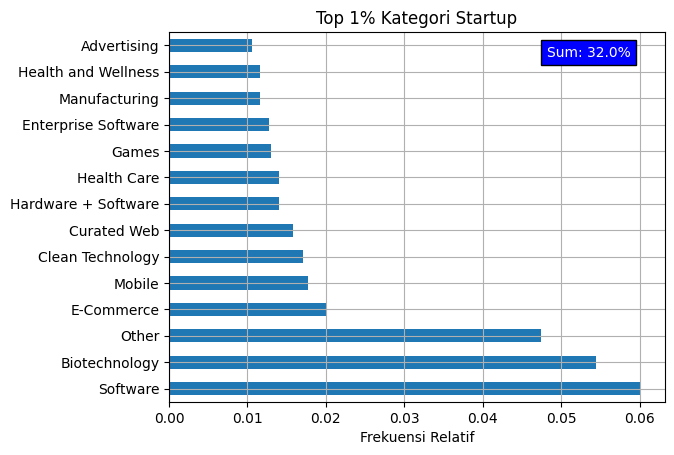

In [172]:
categories = df['category_list']
categories = categories.fillna('Other')
categories.value_counts()

categories_norm = categories.value_counts(normalize=True)
top_1_percent = categories_norm[categories_norm>0.01]
top_1_percent.plot(kind='barh')
plt.title('Top 1% Kategori Startup')
plt.xlabel('Frekuensi Relatif')
plt.grid(True)
plt.text(0.8*max(top_1_percent), len(top_1_percent)-1,f'Sum: {top_1_percent.sum().round(3)*100}%', ha='left', va='top',color='white', bbox=dict(facecolor='blue', alpha=1))
plt.show()

Dari diagram di atas, dapat disimpulkan bahwa kategori 'Software' saat ini sedang banyak ditekuni oleh banyak startup. Disusul oleh 'Biotechnology'.

#### **Persebaran Lokasi Startup**

<ipython-input-173-f62cfbf3238b>:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



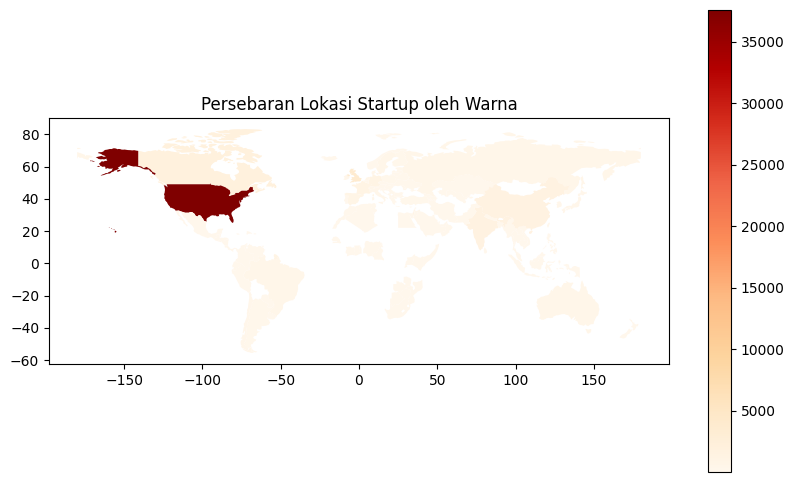

In [173]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = df.groupby('country_code').size().reset_index(name='counts')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country_code')
merged.plot(column='counts', cmap='OrRd', legend=True, figsize=(10,6))
plt.title('Persebaran Lokasi Startup oleh Warna')
plt.show()

Berdasarkan grafik di atas, mayoritas besar dari startup yang ada pada dataset berlokasi di USA. Karena ada begitu banyak startup yang berlokasi di AS sehingga semua negara lain ditampilkan di bawah 5000.

#### **Jumlah Startup yang Masih Beroperasi berdasarkan Negara**

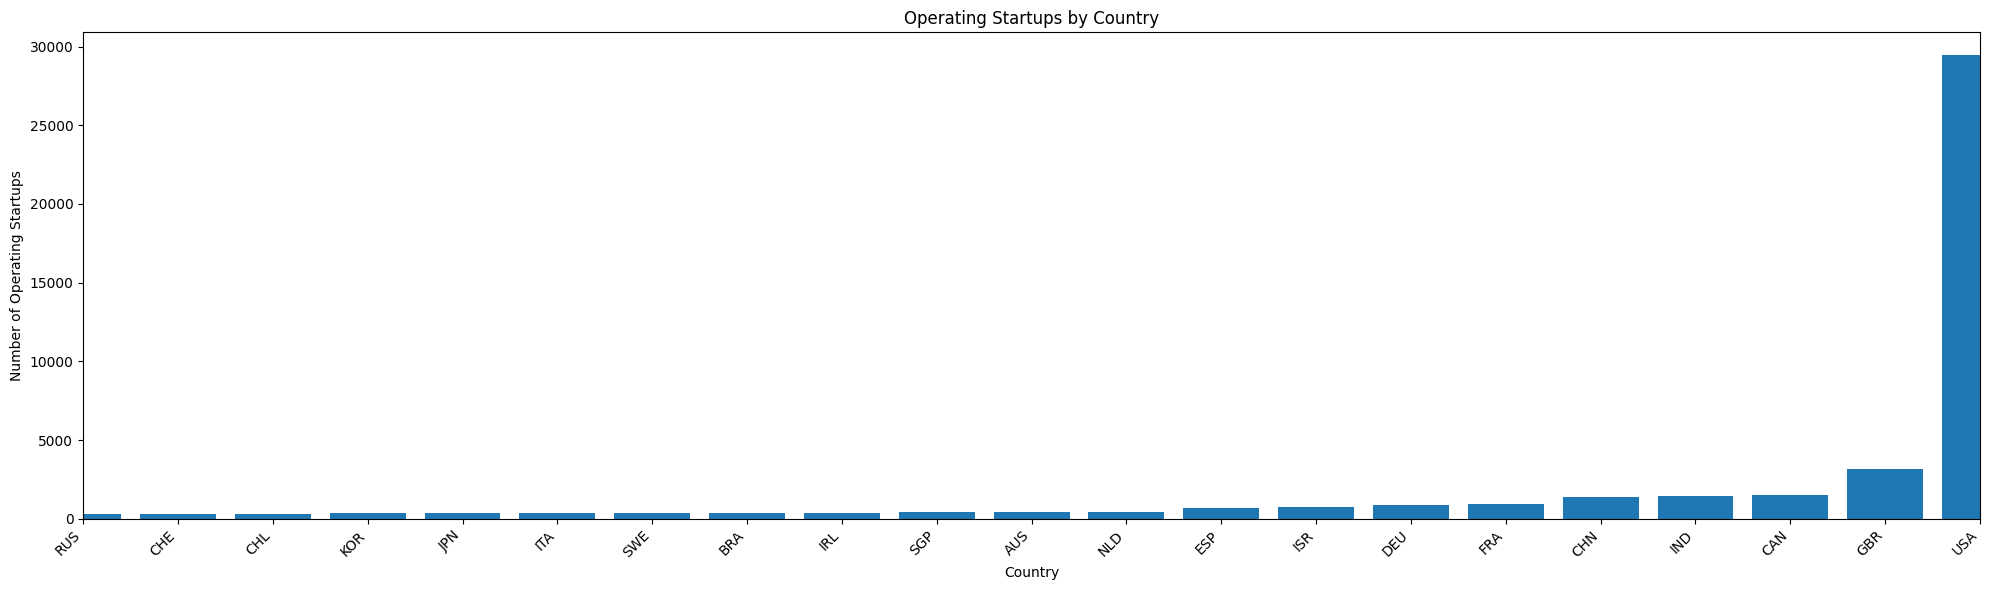

In [174]:
operating_df = df[df["status"] == "operating"]
country_counts = operating_df["country_code"].value_counts()

plt.figure(figsize=(20, 6))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel("Country")
plt.ylabel("Number of Operating Startups")
plt.title("Operating Startups by Country")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.xlim(20, 0)

plt.tight_layout()
plt.show()

Diagram di atas memperlihatkan bahwa startup yang saat ini masih beroperasi paling banyak berada di USA dan memiliki perbandingan yang jauh dengan negara lainnya.

#### **Status Startup di Setiap Negara**

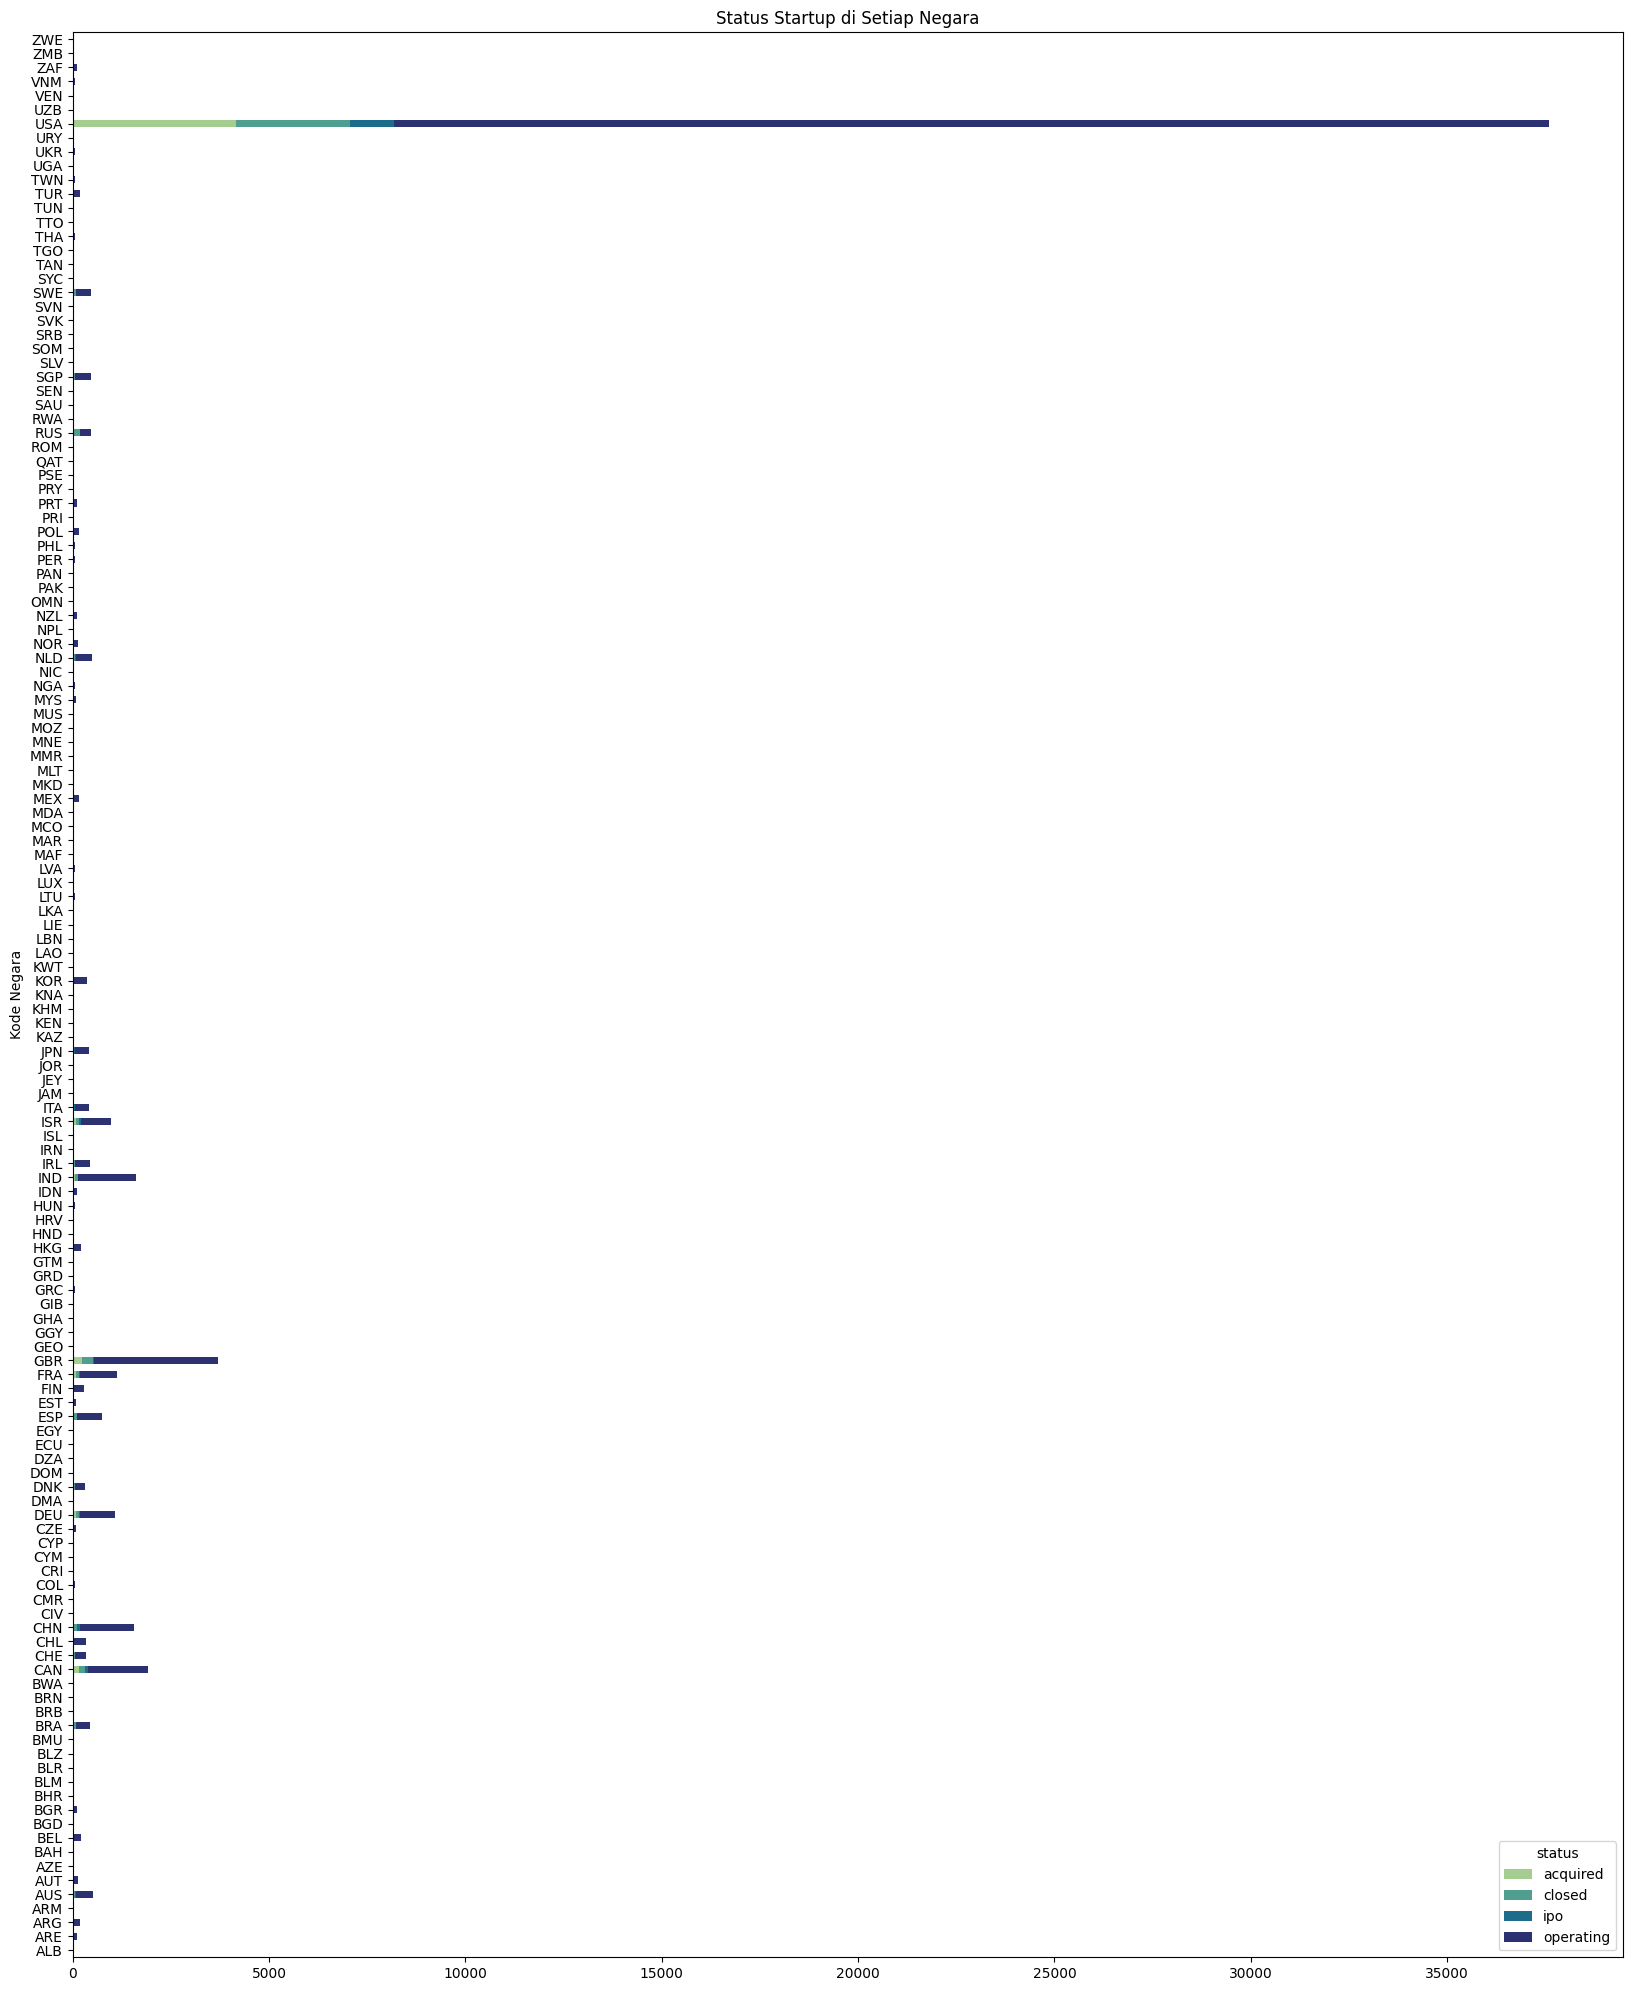

In [175]:
pivot_table = df.pivot_table(index='country_code', columns='status', aggfunc='size', fill_value=0)

pivot_table.plot(kind='barh', stacked=True, colormap='crest', figsize=(20, 25))

plt.ylabel('Kode Negara')
plt.title('Status Startup di Setiap Negara')

# # Batasi nilai sumbu Y
# plt.ylim(0, 10)  # Batasi nilai minimum dan maksimum
plt.show()

Diagram di atas menunjukkan status startup di setiap negara. Dapat dilihat bahwa USA memiliki startup yang begitu banyak dibandingkan dengan negara lainnya. Dan dapat dilihat bahwa banyak startup yang saat ini masih beroperasi.

##**Verify Data Quality**

####Missing Values

In [176]:
pd.DataFrame(df.isna().sum(), columns=['Jumlah Nilai Kosong'])

,Jumlah Nilai Kosong
permalink,0
name,1
homepage_url,5058
category_list,3148
funding_total_usd,0
status,0
country_code,6958
state_code,8547
region,8030
city,8028


Dari tabel di atas, terlihat bahwa cukup banyak kolom yang memiliki nilai kosong. Diantaranya adalah kolom nama, homepage_url, category_list, country_code, state_code, region, city, founded_at, dan first_funding_at. Sedangkan, kolom lainnya seperti kolom permalink, funding_total_usd, status, funding_rounds, dan last_funding_at tidak memiliki nilai kosong yang dimana artinya adalah kolom tersebut memiliki nilai yang valid dan lengkap tanpa kekurangan informasi.

####Outliers Values

In [177]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Nama Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
result_df = pd.DataFrame(results)
result_df.set_index('Nama Kolom', inplace=True)
result_df = result_df.rename_axis(None, axis=0).rename_axis('Nama Kolom', axis=1)

# Menampilkan dataframe
display(result_df)

Nama Kolom,Persentase Outliers
funding_rounds,8.945576


Berdasarkan output di atas, kolom funding_rounds memiliki persentse outliers sebanyak 8.9% atau sekitar 9%. Itu menunjukkan bahwa ada beberapa startup yang melakukan putaraan pendanaan yang lebih banyak atau signifikan dibandingkan rata-rata startup lainnya.

####Duplicated Values

In [178]:
df[df.duplicated()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at


Berdasarkan output di atas, dapat dilihat bahwa tidak ada satupun nilai/record data yang muncul. Maka dari itu, dapat disimpulkan bahwa tidak ada duplikasi data pada dataset ini, karena setiap baris atau record data memiliki nilai yang unik/satu.

####Inconsistent Values / Noise (Optional)

In [179]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase (%), yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong atau missing values. Missing value sendiri biasanya adalah data-data yang tidak dapat terdeteksi dan disimbolkan dengan "Nan" atau tanda tanya (?) atau blank cell yang tidak ada nilainya sama sekali.

In [180]:
print((df.isna().sum() / len(df)) * 100)

permalink             0.000000
name                  0.001507
homepage_url          7.621143
category_list         4.743250
funding_total_usd     0.000000
status                0.000000
country_code         10.483968
state_code           12.878194
region               12.099204
city                 12.096191
funding_rounds        0.000000
founded_at           22.934245
first_funding_at      0.036162
last_funding_at       0.000000
dtype: float64


Berdasarkan data di atas, ada 9 kolom yang memiliki missing values, yaitu kolom name, homepage_url (7-8%), category_list (4-5%), country_code (10-11%), state_code (12-13%), region (12%), city (12%), founded_at (22-23%), dan first_funding_at. Di bawah ini akan dijabarkan lebih lanjut.

Berikut adalah nilai kosong pada kolom founded_at.

In [181]:
df[df['founded_at'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,-,operating,USA,NC,NC - Other,Connellys Springs,1,NaN,2013-04-21,2013-04-21
28,/organization/100du-tv,100du.tv,http://www.100du.com,Hospitality,3000000,operating,CHN,23,Shanghai,Shanghai,2,NaN,2008-01-07,2010-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66351,/organization/zynergy-projects-services,Zynergy Projects & Services,http://www.zynergygroup.net/,Clean Technology,-,operating,IND,25,Chennai,Chennai,1,NaN,2015-08-19,2015-08-19
66359,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,1510500,operating,USA,MA,Boston,Cambridge,4,NaN,2010-10-21,2012-10-18
66360,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,8500000,acquired,USA,WI,Milwaukee,Milwaukee,1,NaN,2004-12-16,2004-12-16
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01


Terdapat 15221 baris yang kosong pada kolom founded_at.

Berikut adalah nilai kosong di state_code.

In [182]:
df[df['state_code'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
21,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,43923865,operating,NaN,NaN,NaN,NaN,1,2008-01-01,2010-04-01,2010-04-01
35,/organization/10k-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,100000,operating,NaN,NaN,NaN,NaN,1,2015-04-01,2015-09-04,2015-09-04
39,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,-,operating,NaN,NaN,NaN,NaN,2,2012-01-01,2013-07-31,2014-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66317,/organization/zuumtel,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,300000,closed,NaN,NaN,NaN,NaN,2,2014-09-16,2013-04-01,2014-09-16
66325,"/organization/zwayo-""on-demand-valet-parking""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,60000,operating,NaN,NaN,NaN,NaN,1,2014-09-01,2014-09-01,2014-09-01
66333,/organization/zyfin,Zyfin,http://www.zyfin.com/,Finance,-,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01


Terdapat 8547 baris yang kosong pada kolom state_code.

Berikut adalah nilai kosong pada kolom region.

In [183]:
df[df['region'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
21,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,43923865,operating,NaN,NaN,NaN,NaN,1,2008-01-01,2010-04-01,2010-04-01
35,/organization/10k-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,100000,operating,NaN,NaN,NaN,NaN,1,2015-04-01,2015-09-04,2015-09-04
39,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,-,operating,NaN,NaN,NaN,NaN,2,2012-01-01,2013-07-31,2014-02-03
45,/organization/115-network-disks,115 network disks,http://www.115.com/,EdTech|Education,-,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66317,/organization/zuumtel,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,300000,closed,NaN,NaN,NaN,NaN,2,2014-09-16,2013-04-01,2014-09-16
66325,"/organization/zwayo-""on-demand-valet-parking""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,60000,operating,NaN,NaN,NaN,NaN,1,2014-09-01,2014-09-01,2014-09-01
66333,/organization/zyfin,Zyfin,http://www.zyfin.com/,Finance,-,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01


Terdapat 8030 baris yang kosong pada kolom region.

Berikut adalah nilai kosong pada kolom city.

In [184]:
df[df['city'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
21,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,43923865,operating,NaN,NaN,NaN,NaN,1,2008-01-01,2010-04-01,2010-04-01
35,/organization/10k-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,100000,operating,NaN,NaN,NaN,NaN,1,2015-04-01,2015-09-04,2015-09-04
39,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,-,operating,NaN,NaN,NaN,NaN,2,2012-01-01,2013-07-31,2014-02-03
45,/organization/115-network-disks,115 network disks,http://www.115.com/,EdTech|Education,-,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66317,/organization/zuumtel,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,300000,closed,NaN,NaN,NaN,NaN,2,2014-09-16,2013-04-01,2014-09-16
66325,"/organization/zwayo-""on-demand-valet-parking""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,60000,operating,NaN,NaN,NaN,NaN,1,2014-09-01,2014-09-01,2014-09-01
66333,/organization/zyfin,Zyfin,http://www.zyfin.com/,Finance,-,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01


Terdapat 8028 baris yang kosong pada kolom city.

Berikut adalah nilai kosong pada kolom country_code.

In [185]:
df[df['country_code'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
21,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,43923865,operating,NaN,NaN,NaN,NaN,1,2008-01-01,2010-04-01,2010-04-01
35,/organization/10k-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,100000,operating,NaN,NaN,NaN,NaN,1,2015-04-01,2015-09-04,2015-09-04
39,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,-,operating,NaN,NaN,NaN,NaN,2,2012-01-01,2013-07-31,2014-02-03
45,/organization/115-network-disks,115 network disks,http://www.115.com/,EdTech|Education,-,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66317,/organization/zuumtel,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,300000,closed,NaN,NaN,NaN,NaN,2,2014-09-16,2013-04-01,2014-09-16
66325,"/organization/zwayo-""on-demand-valet-parking""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,60000,operating,NaN,NaN,NaN,NaN,1,2014-09-01,2014-09-01,2014-09-01
66333,/organization/zyfin,Zyfin,http://www.zyfin.com/,Finance,-,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01


Terdapat 6958 baris yang kosong pada kolom country_code.

Berikut adalah nilai kosong pada kolom homepage_url.

In [186]:
df[df['homepage_url'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,-,operating,USA,NC,NC - Other,Connellys Springs,1,NaN,2013-04-21,2013-04-21
16,/organization/1-of-99,1 of 99,NaN,Entertainment|Games,100000,operating,USA,CA,SF Bay Area,Mountain View,1,2014-12-01,2014-12-13,2014-12-13
43,/organization/10°north,10°North,NaN,Fashion,-,operating,CAN,ON,Toronto,Mississauga,1,2013-01-05,2014-08-12,2014-08-12
51,/organization/121-rentals,121 Rentals,NaN,Real Estate,-,operating,USA,TX,TX - Other,Amarillo,1,2011-04-12,2014-09-03,2014-09-03
75,/organization/16-mile-solutions,16 Mile Solutions,NaN,Software,199957,operating,USA,WA,Seattle,Seattle,1,2006-01-01,2009-06-11,2009-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66247,/organization/zperfectgift,zPerfectGift,NaN,Social Media,25000,operating,USA,UT,Salt Lake City,Midvale,1,2010-01-01,2012-09-26,2012-09-26
66267,/organization/zuffle,Zuffle,NaN,Application Platforms|Entertainment|Games|Grap...,132351,operating,ITA,17,ITA - Other,Prato,1,NaN,2013-07-26,2013-07-26
66292,/organization/zumodrive,zumodrive,NaN,Cloud Computing|Digital Media|File Sharing,-,operating,NaN,NaN,NaN,NaN,1,NaN,2007-09-01,2007-09-01
66311,/organization/zuse,Zuse,NaN,Software,-,operating,USA,NY,New York City,New York,1,NaN,2013-05-01,2013-05-01


Terdapat 5058 baris yang kosong pada kolom homepage_url.

Berikut adalah nilai kosong pada kolom category_list.

In [187]:
df[df['category_list'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
56,/organization/123feng-com,123Feng.Com,http://123feng.com/,NaN,13000000,operating,CHN,2,Hangzhou,Hangzhou,1,2014-01-01,2015-10-27,2015-10-27
71,/organization/15fen,15Fen,http://www.15fen.com/,NaN,-,operating,CHN,30,Guangzhou,Guangzhou,1,NaN,2013-12-15,2013-12-15
79,/organization/17-media,17 Media,http://17.media,NaN,10000000,operating,NaN,NaN,NaN,NaN,1,2015-07-15,2015-11-05,2015-11-05
109,/organization/1mxians,1mxians,http://www.1mxian.com/,NaN,15000000,operating,CHN,22,Beijing,Beijing,1,2014-01-01,2015-12-02,2015-12-02
113,/organization/1rp-media,1RP Media,NaN,NaN,-,operating,USA,CA,Los Angeles,Los Angeles,1,2011-01-01,2012-06-29,2012-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66112,/organization/zkey-com,Zkey.com,http://zkey.com/,NaN,10000000,closed,NaN,NaN,NaN,NaN,1,NaN,1999-11-22,1999-11-22
66115,/organization/zlango,Zlango,http://www.zlango.com,NaN,12000000,closed,NaN,NaN,NaN,NaN,1,NaN,2007-02-12,2007-02-12
66120,/organization/zlote-mysli,Zlote Mysli,http://www.zlotemysli.pl/,NaN,-,operating,NaN,NaN,NaN,NaN,1,NaN,2009-01-01,2009-01-01
66298,/organization/zuoyebang,Zuoyebang,http://zuoye.baidu.com/,NaN,-,operating,NaN,NaN,NaN,NaN,1,NaN,2015-09-03,2015-09-03


Terdapat 3148 baris yang kosong pada kolom category_list.

Berikut adalah nilai kosong pada kolom first_funding_at.

In [188]:
df[df['first_funding_at'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2445,/organization/align-commerce,Align Commerce,https://aligncommerce.com/,Bitcoin|Payments,12500000,operating,USA,CA,SF Bay Area,San Francisco,3,2014-02-01,NaN,2015-11-17
3334,/organization/aniways,Aniways,http://www.aniways.com,Advertising|Chat|Messaging|Mobile|Social Media,1190000,operating,ISR,5,Tel Aviv,Tel Aviv-yafo,6,2012-01-01,NaN,2014-03-23
8029,/organization/booknbloom,Book'n'Bloom,http://www.booknbloom.com,CRM|Facebook Applications|Small and Medium Bus...,1408347,operating,CYP,4,Cyprus,Nicosia,5,2011-11-01,NaN,2014-07-01
9843,/organization/carglass-inc,"CarGlass, Inc.",http://www.carglassapp.com,Automotive|Content Discovery|Machine Learning|...,1000000,operating,USA,CA,SF Bay Area,Palo Alto,2,2014-05-12,NaN,2014-10-22
10204,/organization/cbtec,CBTec Oy,http://www.eliademy.com,Education|Mobility|Online Education|Software,304012,operating,FIN,13,Helsinki,Helsinki,2,2012-02-08,NaN,2014-04-24
14717,/organization/dashtag,DashTag,http://www.getdashtag.com,NaN,60854.7422214472,operating,NaN,NaN,NaN,NaN,2,2015-10-01,NaN,2015-11-20
16250,/organization/dopay,dopay,http://www.dopay.com,Financial Services,1675550.80940274,operating,GBR,H9,London,London,3,2014-01-04,NaN,2014-09-01
17589,/organization/eku-power-drives,EKU Power Drives,http://www.ekupd.com/,Clean Energy|Energy Efficiency|Industrial|Mini...,297149,operating,DEU,1,Stuttgart,Stuttgart,3,2015-03-04,NaN,2015-01-20
20101,/organization/fear-less-solutions,Revolar,http://www.revolar.com,Wearables,3320000,operating,USA,CO,Denver,Denver,3,2013-01-01,NaN,2015-11-26
23422,/organization/gobold,gobold,http://www.gobold.com/,Banking|Payments,960000,operating,USA,CA,SF Bay Area,San Francisco,2,2013-10-29,NaN,2014-01-27


Berikut adalah nilai kosong pada kolom name.

In [189]:
df[df['name'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
56916,/organization/tell-it-in,NaN,http://tellitin10.com,Startups,25000,closed,USA,OR,"Portland, Oregon",Portland,1,2011-10-01,2012-03-01,2012-03-01


Terdapat 1 baris yang kosong pada kolom name.

#####**Hapus Missing Values**

Berdasarkan hasil pengecekkan missing value di atas, tidak ada kolom yang mencapai 70%, sehingga tidak perlu melakukan penghapusan missing values.

#####Imputasi Missing Values

Karena semua kolom yang memiliki missing values adalah bukan kolom bertipe data angka dan tidak bisa mencari nilai mean, median, dan kuartil. Sehingga menggunakan nilai modus.

In [190]:
df['founded_at'] = df['founded_at'].fillna(df['founded_at'].mode()[0])

In [191]:
df['state_code'] = df['state_code'].fillna(df['state_code'].mode()[0])

In [192]:
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [193]:
df['city'] = df['city'].fillna(df['city'].mode()[0])

In [194]:
df['country_code'] = df['country_code'].fillna(df['country_code'].mode()[0])

In [195]:
df['homepage_url'] = df['homepage_url'].fillna(df['homepage_url'].mode()[0])

In [196]:
df['category_list'] = df['category_list'].fillna(df['category_list'].mode()[0])

In [197]:
df['first_funding_at'] = df['first_funding_at'].fillna(df['first_funding_at'].mode()[0])

In [198]:
df['name'] = df['name'].fillna(df['name'].mode()[0])

#####**Pengecekkan Ulang**

In [199]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
permalink,0.0
name,0.0
homepage_url,0.0
category_list,0.0
funding_total_usd,0.0
status,0.0
country_code,0.0
state_code,0.0
region,0.0
city,0.0


Dari data di atas, terlihat bahwa presentase missing values dari setiap kolom sudah menjadi 0, berarti tidak ada lagi missing values pada dataset ini.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [200]:
df[df.duplicated()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at


Berdasarkan data di atas, terlihat bahwa tidak ada satupun data yang duplikat. Berarti dalam dataset tersebut tidak ada nilai duplikat sama sekali.

#####**Hapus Nilai Duplikat**

Karena berdasarkan hasil pengecekkan nilai duplikat bahwa tidak ada nilai duplikat, maka tidak perlu dilakukan hapus nilai duplikat.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [201]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
funding_rounds,8.945576


Data di atas menunjukkan presentase nilai yang jauh berbeda dari nilai lainnya dalam sebuah kumpulan data.

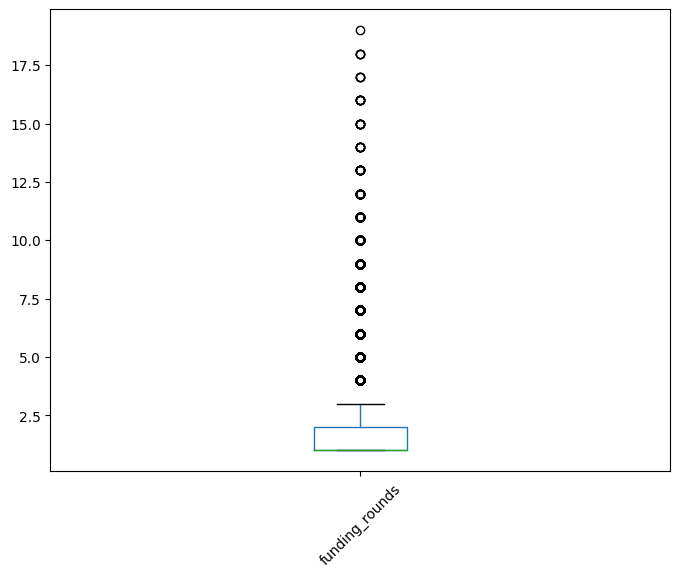

In [202]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

Dari gambar di atas menunjukkan bahwa pola dari outliers nya sama, tidak ada nilai yang tiba-tiba jauh berbeda dari kumpulan data lainnya.

#####**Hapus Outliers**

Karena tidak ada nilai yang tiba-tiba jauh berbeda dengan nilai lainnya, makan outliers tidak perlu dihapus.

#####**Imputasi Outliers**

Tidak memerlukan imputasi outliers, karena tidak ada kolom dengan presentase outliers >=10%.

#####**Pengecekkan Ulang**

In [203]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
funding_rounds,8.945576


Presentase outliers tetap, yaitu 8-9% karena outliers tidak dihapus.

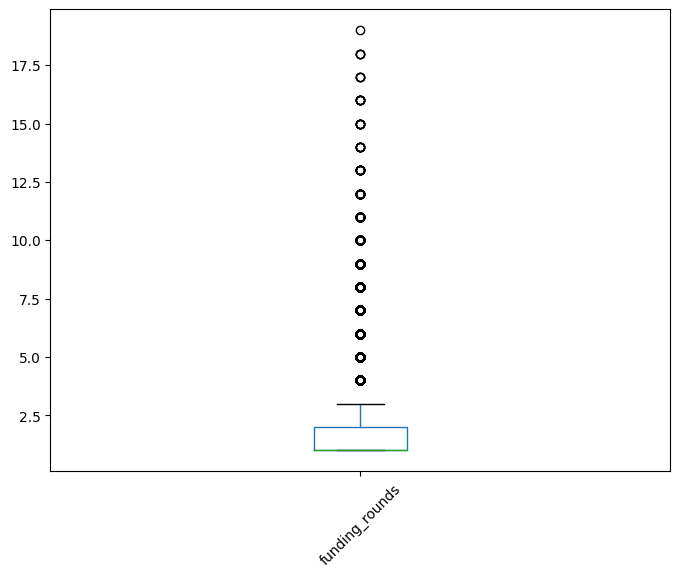

In [204]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [205]:
df['founded_year'] = df['founded_at'].str[:4]

Disini ditambahkan kolom founded_yar yang diambil dari kolom founded_at. Dimana kolom founded_at ini berisi tanggal, bulan, dan tahun pendirian startup. Namun agar lebih efisien, dibuatlah kolom founded_year yang mengambil tahunnya saja.

In [206]:
status = []

for i in df['status']:
    if i in ['acquired','ipo']:
        status.append('success')
    elif i == 'closed':
        status.append('fail')
    else:
        status.append('operating')

df['status_class'] = status

Disini menambahkan kolom status_class. Menyederhanakan kategori status dari kolom status. Dimana acquired dan ipo masuk ke dalam kategori success, closed masuk ke dalam kategori fail, dan operating tetap menjadi kategori operating.

###**Pengecekkan Hasil**

In [207]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,status_class
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,2012-01-01,2015-01-05,2015-01-05,2012,operating
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,2014,operating
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,USA,CA,SF Bay Area,San Francisco,1,2012-01-01,2014-01-30,2014-01-30,2012,operating
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2007,operating
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,2010,operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,2012-01-01,2012-04-01,2012-04-01,2012,operating
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,2012,operating
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,Software,-,operating,USA,CA,SF Bay Area,San Francisco,1,2011-01-01,2014-08-01,2014-08-01,2011,operating
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,2014,operating


Pada tabel di atas, terlihat bahwa sudah ada 2 (dua) kolom baru yaitu founded_year dan status_class.

#**Data Reduction**

###**Mengurangi Fitur-Fitur yang Kurang Relevan**

In [208]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [209]:
df = df.drop(['permalink','homepage_url','state_code','region','founded_at'], axis=1)

Kolom permalink, homepage_url, state_code, region, dan founded_at dirasa kurang relevan dan kurang berpengaruh terhadap analisis yang dilakukan, yaitu memprediksi kesuksesan startup. Sehingga perlu untuk dihapus agar dataset lebih efisien.

###**Pengecekkan Hasil**

In [210]:
df.head()

,name,category_list,funding_total_usd,status,country_code,city,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class
0,#fame,Media,10000000,operating,IND,Mumbai,1,2015-01-05,2015-01-05,2012,operating
1,:Qounter,Application Platforms|Real Time|Social Network...,700000,operating,USA,Delaware City,2,2014-03-01,2014-10-14,2014,operating
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878,operating,USA,San Francisco,1,2014-01-30,2014-01-30,2012,operating
3,0-6.com,Curated Web,2000000,operating,CHN,Beijing,1,2008-03-19,2008-03-19,2007,operating
4,004 Technologies,Software,-,operating,USA,Champaign,1,2014-07-24,2014-07-24,2010,operating


Pada tabel di atas terlihat hanya tersisa 11 kolom. 9 kolom asli dan 2 kolom tambahan yang sebelumnya.

1. name: Kolom yang tentunya penting karena memuat nama dari startup.
2. category_list: Kolom ini dapat memberikan informasi terkait industri yang dimasuki oleh startup. Dan industri tentu memiliki tingkat risiko dan peluang yang berbeda-beda.
3. funding_total_usd: Kolom ini berisi jumlah pendanaan yang diterima startup dan ini dapat menjadi indikator potensi kesuksesan. Startup dengan pendanaan lebih besar biasanya memiliki peluang yang lebih tinggi untuk sukses.
4. status: Kolom status dapat memberikan gambaran tentang kinerja startup.
5. country_code: Kolom ini cukup berpengaruh karena untuk menentukan, startup di negara mana yang paling banyak meraih kesuksesan. Karena negara dapat memengaruhi faktor-faktor seperti akses ke pasar, regulasi, dll.
6. city: Sama seperti dengan country_code, ini juga dapat memengaruhi faktor-faktor kesuksesan startup.
7. funding_rounds: Jumlah putaran pendanaan dapat memberikan indikator tentang minat investor dan kemajuan startup. Startup yang telah melalui banyak putaran pendanaan mungkin memiiki peluang lebih tinggi untuk sukses.
8. first_funding_at: Tanggal pendanaan yang pertama startup dapat memberikan informasi terkait waktu startup mulai menerima dana. Bisa saja startup yang menerima pendanaan lebih awal memiliki peluang lebih tinggi untuk sukses.
9. last_funding_at: Sama seperti tanggal pendanaan pertama, tanggal pendanaan terakhir juga dapat memberikan informasi yang berharga untuk dianalisis.
10. founded_year: Tahun pendirian startup dapat memberikan informasi terkait usia startup. Startup yang telah lama berdiri mungkin saja memiliki lebih banyak pengalaman.
11. status_class: Sama seperti dengan kolom status_class.

#**Data Transformation**

###**Encoding**

In [211]:
status_class = pd.get_dummies(df['status_class'])
df = pd.concat([df,status_class],axis=1)
df.head()

,name,category_list,funding_total_usd,status,country_code,city,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,fail,operating,success
0,#fame,Media,10000000,operating,IND,Mumbai,1,2015-01-05,2015-01-05,2012,operating,0,1,0
1,:Qounter,Application Platforms|Real Time|Social Network...,700000,operating,USA,Delaware City,2,2014-03-01,2014-10-14,2014,operating,0,1,0
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878,operating,USA,San Francisco,1,2014-01-30,2014-01-30,2012,operating,0,1,0
3,0-6.com,Curated Web,2000000,operating,CHN,Beijing,1,2008-03-19,2008-03-19,2007,operating,0,1,0
4,004 Technologies,Software,-,operating,USA,Champaign,1,2014-07-24,2014-07-24,2010,operating,0,1,0


Encoding merubahh data kategorikal menjadi numerikal. Pada dataset ini, kolom status_class dipecah lagi menjadi 3 kolom, yaitu fail, operating, dan success. Jika startup tersebut fail, maka pada kolom fail akan terisi angka 1 dan pada kolom operating dan success akan terisi angka 0. Dan begitupun seterusnya.

###**Pengecekkan Hasil**

In [212]:
df.head()

,name,category_list,funding_total_usd,status,country_code,city,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,fail,operating,success
0,#fame,Media,10000000,operating,IND,Mumbai,1,2015-01-05,2015-01-05,2012,operating,0,1,0
1,:Qounter,Application Platforms|Real Time|Social Network...,700000,operating,USA,Delaware City,2,2014-03-01,2014-10-14,2014,operating,0,1,0
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878,operating,USA,San Francisco,1,2014-01-30,2014-01-30,2012,operating,0,1,0
3,0-6.com,Curated Web,2000000,operating,CHN,Beijing,1,2008-03-19,2008-03-19,2007,operating,0,1,0
4,004 Technologies,Software,-,operating,USA,Champaign,1,2014-07-24,2014-07-24,2010,operating,0,1,0


###**Mengubah Tipe Data**

In [213]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None

df['funding_total_usd'] = df['funding_total_usd'].apply(convert_to_float)

Tipe data pada kolom funding_total_usd akan diubah menjadi float dari yang sebelumnya string. Karena kolom funding_total_usd berisi nilai numerik yaitu total pendanaan startup dalam usd.

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               66368 non-null  object 
 1   category_list      66368 non-null  object 
 2   funding_total_usd  53583 non-null  float64
 3   status             66368 non-null  object 
 4   country_code       66368 non-null  object 
 5   city               66368 non-null  object 
 6   funding_rounds     66368 non-null  int64  
 7   first_funding_at   66368 non-null  object 
 8   last_funding_at    66368 non-null  object 
 9   founded_year       66368 non-null  object 
 10  status_class       66368 non-null  object 
 11  fail               66368 non-null  uint8  
 12  operating          66368 non-null  uint8  
 13  success            66368 non-null  uint8  
dtypes: float64(1), int64(1), object(9), uint8(3)
memory usage: 5.8+ MB


#**Dataframe to CSV**

In [215]:
df.to_csv('Data Cleaned.csv', index=False)